<html>
    <h1 align='center'>Peramalan Jumlah Kasus Demam Berdarah di
        Kabupaten Malang Menggunakan Metode Fuzzy
        Inference System</h1>
</html>

Penelitian ini menggunaan metode Fuzzy Inference
System dalam meramalkan jumlah kasus Demam Berdarah di
Kabupaten Malang dengan melibatkan variabel kepadatan
penduduk.

## Import Modul
<html>
    <div><br>Implementasi fuzzy untuk memprediksi jumlah kasus demam berdarah dengan bahasa python menggunakan modul:
    <ul>
        <li><b>Sci-Kit Fuzzy</b>, berisi metode-metode operasi logika fuzzy</li>
        <img src="https://pythonhosted.org/scikit-fuzzy/_static/img/logo.png" alt="Logo SKFuzzy" width=200><img>
        <li><b>Matplotlib</b>, berisi alat untuk visualisasi logika fuzzy</li>
        <img src="https://matplotlib.org/_static/logo2.png" alt="Logo Matplotlib " width=200><img>
        <li><b>Numpy</b>, untuk pengoperasian matematika yang dimudahkan</li>
        <img src="https://static.javatpoint.com/tutorial/numpy/images/numpy-tutorial.png" alt="Logo Numpy"><img>
        </ul>
    </div>
</html>

In [1]:
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

Sistem fuzzy secara umum terdapat 5 langkah dalam melakukan penalaran, yaitu:

1. Fuzzyfikasi
2. Inference Method
3. Defuzzyfikasi

<h2>Fuzzyfikasi</h2>
    <div><br>Dalam Sistem Fuzzy, diperlukan nilai input, output dan model fuzzy. Disini dideklarasikan sebuah deret bilangan <i>"dbd"</i> dan <i>"penduduk"</i> yang akan digunakan sebagai lintasan pada fungsi keanggotaan fuzzy.</div>

In [2]:
dbd=np.arange(0,251,1)
penduduk=np.arange(240,291,1)

<html>
    <div>
        Di dalam modul SKFuzzy, terdapat modul bernama control yang berfungsi untuk mengendalikan sistem fuzzy. Terdapat fungsi Antecedent yang mendeklarasikan input, lalu Consequent yang mendeklarasikan output. 
    </div><br>
    <div>lvl adalah jumlah kasus demam berdarah, grow adalah pertumbuhan penduduk, prediksi adalah prediksi jumlah kasus demma berdarah berdasarkan hasil komputasi fuzzy. Jumlah kasus dibagi menjadi 7 level dari very very low sampai very very high</div>
</html>

In [3]:
lvl=ctrl.Antecedent(dbd,'lvl')
grow=ctrl.Antecedent(penduduk,'grow')
prediksi=ctrl.Consequent(dbd,'prediksi')

<html>
    <div>
        Di bawah terdapat fungsi keanggotaan menggunakan <i>SKFuzzy Membership Function</i> dengan bermacam bentuk yaitu segitiga(trimf), trapezoid(trapmf), dan sigmoid(sigmf).
    </div>
</html>

\begin{aligned}VVL=\begin{cases} 
      1 & x\leq 5 \\
      \frac{10-x}{5} & 5 < x < 10 \\
      0 & x\geq 10 
  \end{cases}
  \end{aligned}

\begin{aligned}VL=\begin{cases} 
      0 & x\leq 7.5 \text{ or } x\geq20 \\
      \frac{x-7.5}{6.25} & 7.5 < x \leq 13.75 \\
      \frac{20-x}{6.25} & 13.75<x< 20 
   \end{cases}
   \end{aligned}

\begin{aligned}L=\begin{cases} 
      0 & x\leq 17.5 \text{ or } x\geq30 \\
      \frac{x-17.5}{6.25} & 17.5 < x \leq 23.75 \\
      \frac{30-x}{6.25} & 23.75<x< 30 
   \end{cases}
   \end{aligned}

\begin{aligned}N=\begin{cases} 
      0 & x\leq 25 \text{ or } x\geq50 \\
      \frac{x-25}{12.5} & 25 < x \leq 37.5 \\
      \frac{50-x}{12.5} & 37.5<x< 50 
   \end{cases}
   \end{aligned}

\begin{aligned}H=\begin{cases} 
      0 & x\leq 40\text{ or } x\geq90\\
      \frac{x-40}{25} & 40< x \leq 65 \\
      \frac{90-x}{25} & 65<x< 90
   \end{cases}
   \end{aligned}

\begin{aligned}VH=\begin{cases} 
      0 & x\leq 80 \text{ or } x\geq160 \\
      \frac{x-80}{40} & 80 < x \leq 120 \\
      \frac{160-x}{40} & 120<x< 160
   \end{cases}
   \end{aligned}

\begin{aligned}VVH=\begin{cases} 
      0 & x\leq 150 \\
      \frac{x-150}{50} &150<x<200 \\
      1 & x\geq200
   \end{cases}
   \end{aligned}

$$Grow=\frac{1}{1+e^{-0.4(x-266.3042)}}$$

In [4]:
VVL=fuzz.trapmf(dbd,[1,1,5,10])
VL=fuzz.trimf(dbd,[7.5,13.75,20])
L=fuzz.trimf(dbd,[17.5,23.75,30])
N=fuzz.trimf(dbd,[25,37.5,50])
H=fuzz.trimf(dbd,[40,65,90])
VH=fuzz.trimf(dbd,[80,120,160])
VVH=fuzz.trapmf(dbd,[150,200,249,249])
grw=fuzz.sigmf(penduduk,266.3042,0.4)

Alasan digunakannya trapezoid untuk "Very Very Low" dan "Very Very High" adalah dikarenakan kedua fungsi yang ekstrim sehingga perbedaan nilai tidak berpengaruh besar. Digunakan sigmoid untuk pertumbuhan masyarakat dikarenakan pertumbuhan masyarakat termasuk ke fungsi kompleks-natural

<h2>Visualisasi dari pada fungsi keanggotaan</h2>
<p>Dari 2 input berikutlah nilai fuzzy dihitung</p>

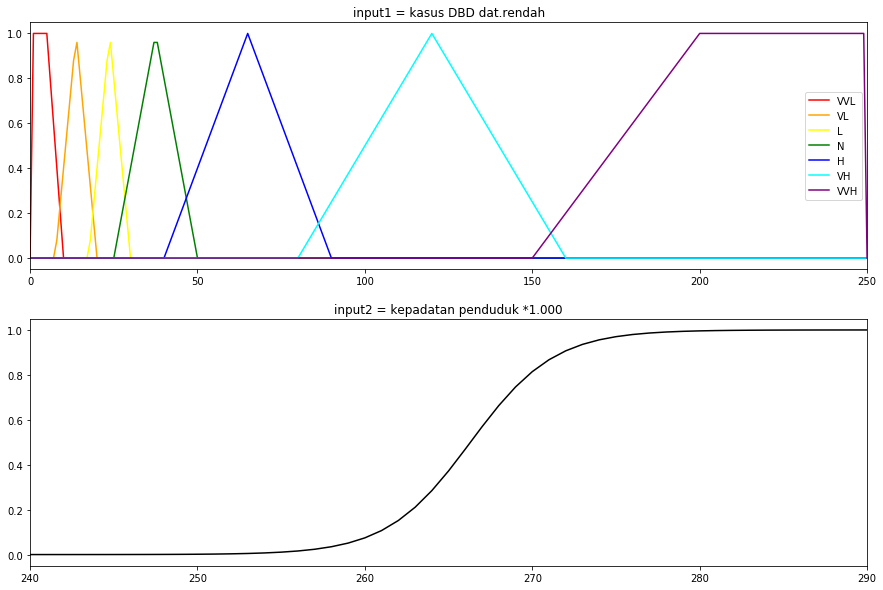

In [5]:
fig,(ax1,ax2)=plt.subplots(nrows=2,figsize=(15,10))
ax1.plot(dbd,VVL,'red',linewidth=1.5,label='VVL')
ax1.plot(dbd,VL,'orange',linewidth=1.5,label='VL')
ax1.plot(dbd,L,'yellow',linewidth=1.5,label='L')
ax1.plot(dbd,N,'green',linewidth=1.5,label='N')
ax1.plot(dbd,H,'blue',linewidth=1.5,label='H')
ax1.plot(dbd,VH,'cyan',linewidth=1.5,label='VH')
ax1.plot(dbd,VVH,'purple',linewidth=1.5,label='VVH')
ax2.plot(penduduk,grw,'black',linewidth=1.5,label='grow')
ax1.set_ybound(-0.05,1.05)
ax1.set_xbound(0,250)
ax2.set_ybound(-0.05,1.05)
ax2.set_xbound(240,290)
ax1.set_title('input1 = kasus DBD dat.rendah')
ax2.set_title('input2 = kepadatan penduduk *1.000')
ax1.legend()
plt.show()

Selanjutnya memasukkan fungsi keanggotaan kedalam input fuzzy

In [6]:
lvl['VVL']=VVL
lvl['VL']=VL
lvl['L']=L
lvl['N']=N
lvl['H']=H
lvl['VH']=VH
lvl['VVH']=VVH
grow['pertumbuhan']=grw

## Fungsi Keluaran
Menggunakan metode Mamdani, fungsi output sudah ditetapkan sebelum perhitungan. Fungsi keluaran dalam kasus ini sama seperti fungsi keanggotaan input 1.

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


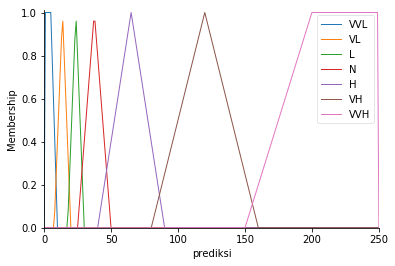

In [7]:
prediksi['VVL']=fuzz.trapmf(dbd,[1,1,5,10])
prediksi['VL']=fuzz.trimf(dbd,[7.5,13.75,20])
prediksi['L']=fuzz.trimf(dbd,[17.5,23.75,30])
prediksi['N']=fuzz.trimf(dbd,[25,37.5,50])
prediksi['H']=fuzz.trimf(dbd,[40,65,90])
prediksi['VH']=fuzz.trimf(dbd,[80,120,160])
prediksi['VVH']=fuzz.trapmf(dbd,[150,200,249,249])
prediksi.view()

## Rules
Membuat rule/aturan yang digunakan sistem fuzzy untuk komputasi keluaran berdasarkan input yang diberikan:

|No.    |Input 1 |Input 2 |Prediksi |
|---|---|---|---|
|1|VVL|Grow|VVL|
|2|VL|Grow|VL|
|3|L|Grow|VVL|
|4|N|Grow|VL|
|5|H|Grow|VVL|
|6|VH|Grow|VL|
|7|VVH|Grow|VVL|

In [8]:
r1=ctrl.Rule(lvl['VVL'] & grow['pertumbuhan'], prediksi['VVL'])
r2=ctrl.Rule(lvl['VL'] & grow['pertumbuhan'], prediksi['VL'])
r3=ctrl.Rule(lvl['L'] & grow['pertumbuhan'], prediksi['L'])
r4=ctrl.Rule(lvl['N'] & grow['pertumbuhan'], prediksi['N'])
r5=ctrl.Rule(lvl['H'] & grow['pertumbuhan'], prediksi['H'])
r6=ctrl.Rule(lvl['VH'] & grow['pertumbuhan'], prediksi['VH'])
r7=ctrl.Rule(lvl['VVH'] & grow['pertumbuhan'], prediksi['VVH'])

Semua rule kemudian dikumpulkan kedalam satu kontrol sistem untuk mendapatkan hasil

In [9]:
hasil=ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r7])

## Defuzzyfikasi
Sistem sekarang bisa dicoba menggunakan data input atau testcase

In [10]:
TestCase=ctrl.ControlSystemSimulation(hasil)

In [11]:
TestCase.input['lvl']=45
TestCase.input['grow']=266.3042

Dicoba menggunakan jumlah kasus berdarah sebanyak 45 kasus dan jumlah penduduk 2.663.042 orang.

Dari fungsi keanggotan di atas, bisa diketahui bahwa jumlah kasus 45 masuk ke daerah keanggotaan lvl[N] dan lvl[H]. Selain dari itu bernilai 0.

\begin{equation}
    \mu lvl[N]=\frac{50-45}{12.5}\\
    \mu lvl[N]=\frac{5}{12.5}\\
    \mu lvl[N]=0.4\\\\
    \end{equation}
    <br>
\begin{equation}
    \mu lvl[H]=\frac{45-40}{25}\\
    \mu lvl[H]=\frac{5}{25}\\
    \mu lvl[H]=0.2\\
\end{equation}

\begin{equation}
    \mu grow=\frac{1}{1+e^{-0.4(266.3042-266.3042)}}\\
    \mu grow=\frac{1}{1+e^{-0.4(0)}}\\
   \end{equation}

\begin{equation}
    \mu grow=\frac{1}{1+e^{0}}\\
    \mu grow=\frac{1}{1+1}\\
\end{equation}
\begin{equation}
    \mu grow=\frac{1}{2}\\
    \mu grow=0,5
\end{equation}

Dimasukkan ke dalam rules satu persatu

1. IF lvl[VVL] AND grow[pertumbuhan] THEN prediksi[VVL]
\begin{equation}
    \alpha(predikat_1)=\mu lvl[VVL] \cap \mu grow[pertumbuhan]\\
    \alpha(predikat_1)=min(\mu lvl[VVL][45] \cap \mu grow[pertumbuhan][266.3042])\\
    \alpha(predikat_1)=min(0;0.5)\\
    \alpha(predikat_1)=0\\
    z_1=0
\end{equation}

2. IF lvl[VL] AND grow[pertumbuhan] THEN prediksi[VL]
\begin{equation}
    \alpha(predikat_2)=\mu lvl[VL] \cap \mu grow[pertumbuhan]\\
    \alpha(predikat_2)=min(\mu lvl[VL][45] \cap \mu grow[pertumbuhan][266.3042])\\
    \alpha(predikat_2)=min(0;0.5)\\
    \alpha(predikat_2)=0\\
    z_2=0
\end{equation}

3. IF lvl[L] AND grow[pertumbuhan] THEN prediksi[L]
\begin{equation}
    \alpha(predikat_3)=\mu lvl[L] \cap \mu grow[pertumbuhan]\\
    \alpha(predikat_3)=min(\mu lvl[L][45] \cap \mu grow[pertumbuhan][266.3042])\\
    \alpha(predikat_3)=min(0;0.5)\\
    \alpha(predikat_3)=0\\
    z_3=0
\end{equation}

4. IF lvl[N] AND grow[pertumbuhan] THEN prediksi[N]
\begin{equation}
    \alpha(predikat_4)=\mu lvl[N] \cap \mu grow[pertumbuhan]\\
    \alpha(predikat_4)=min(\mu lvl[N][45] \cap \mu grow[pertumbuhan][266.3042])\\
    \alpha(predikat_4)=min(0.4;0.5)\\
    \alpha(predikat_4)=0.4\\
\end{equation}
Masukkan ke fungsi keluaran prediksi[N]
\begin{equation}prediksi[N]=\begin{cases} 
      0 & x\leq 25 \text{ or } x\geq50 \\
      \frac{x-25}{12.5} & 25 < x \leq 37.5 \\
      \frac{50-x}{12.5} & 37.5<x< 50 
   \end{cases}
\end{equation}

Ada 2 persamaan yang memenuhi, ambil nilai x terkecil
\begin{equation}
    \frac{x-25}{12.5}=0.4\\
    x-25=5\\
    x=30\\
    \end{equation}
    <br>
\begin{equation}
    \frac{50-x}{12.5}=0.4\\
    50-x=5\\
    x=45\\
\end{equation}
<br>
\begin{equation}
    z_4=30\\
\end{equation}

5. IF lvl[H] AND grow[pertumbuhan] THEN prediksi[H]
\begin{equation}
    \alpha(predikat_5)=\mu lvl[H] \cap \mu grow[pertumbuhan]\\
    \alpha(predikat_5)=min(\mu lvl[H][45] \cap \mu grow[pertumbuhan][266.3042])\\
    \alpha(predikat_5)=min(0.2;0.5)\\
    \alpha(predikat_5)=0.2\\
\end{equation}
Masukkan ke fungsi keluaran prediksi[H]
\begin{aligned}prediksi[H]=\begin{cases} 
      0 & x\leq 40\text{ or } x\geq90\\
      \frac{x-40}{25} & 40< x \leq 65 \\
      \frac{90-x}{25} & 65<x< 90
   \end{cases}
   \end{aligned}

Ada 2 persamaan yang memenuhi, ambil nilai x terkecil
\begin{equation}
    \frac{x-40}{25}=0.2\\
    x-40=5\\
    x=45\\
    \end{equation}
    <br>
\begin{equation}
    \frac{90-x}{25}=0.2\\
    90-x=5\\
    x=85\\
\end{equation}
<br>
\begin{equation}
    z_5=45\\
\end{equation}

6. IF lvl[VH] AND grow[pertumbuhan] THEN prediksi[VH]
\begin{equation}
    \alpha(predikat_6)=\mu lvl[VH] \cap \mu grow[pertumbuhan]\\
    \alpha(predikat_6)=min(\mu lvl[VH][45] \cap \mu grow[pertumbuhan][266.3042])\\
    \alpha(predikat_6)=min(0;0.5)\\
    z_6=0
\end{equation}

7. IF lvl[VVH] AND grow[pertumbuhan] THEN prediksi[VVH]
\begin{equation}
    \alpha(predikat_7)=\mu lvl[VVH] \cap \mu grow[pertumbuhan]\\
    \alpha(predikat_7)=min(\mu lvl[VVH][45] \cap \mu grow[pertumbuhan][266.3042])\\
    \alpha(predikat_7)=min(0;0.5)\\
    z_7=0
\end{equation}

Mencari nilai Z dengan sigma<br>
\begin{equation}
    z=\frac{
    \alpha predikat_1 \times Z_1 +
    \alpha predikat_2 \times Z_2 +
    \alpha predikat_3 \times Z_3 +
    \alpha predikat_4 \times Z_4 +
    \alpha predikat_5 \times Z_5 +
    \alpha predikat_6 \times Z_6 +
    \alpha predikat_7 \times Z_7
    }{
    \alpha predikat_1 + 
    \alpha predikat_2 +
    \alpha predikat_3 + 
    \alpha predikat_4 +
    \alpha predikat_5 + 
    \alpha predikat_6 +
    \alpha predikat_7
    }
\end{equation}

\begin{equation}
    z=\frac{
    0+0+0+
    0.4\times 30 +0.2 \times 45
    +0+0
    }{
    0+0+0+0.4+0.2+0+0
    }
\end{equation}

\begin{equation}
    z=\frac{21}{0.6}\\
    z=33.88
\end{equation}

Jauh sekali dari hasil prediksi berdasarkan modul SKFuzzy

Sudah diketahui nilai prediksi lvl[N] dan lvl[H] masing-masing adalah 0,4 dan 0,2 maka bisa digambarkan sebagai bangun datar

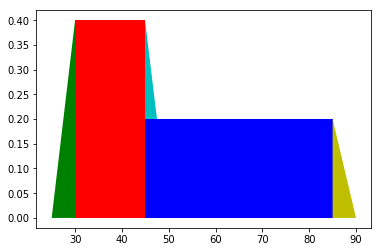

In [31]:
plt.axes()
rectangle = plt.Rectangle((30,0), 15, 0.4, fc='r')
plt.gca().add_patch(rectangle)
rectangle = plt.Rectangle((45,0), 40, 0.2, fc='b')
plt.gca().add_patch(rectangle)
triangle=plt.Polygon([[25,0],[30,0.4],[30,0]],fc='g')
plt.gca().add_patch(triangle)
triangle=plt.Polygon([[45,0.4],[45,0.2],[47.5,0.2]],fc='c')
plt.gca().add_patch(triangle)
triangle=plt.Polygon([[85,0],[85,0.2],[90,0]],fc='y')
plt.gca().add_patch(triangle)
plt.axis('auto')
plt.show()

Bisa dihitung dengan menggunakan Centroid

|Area|Luas|x|y|ax|ay|
|---|---|---|---|---|---|
|1	|1	|3,333333333	|0,133333333	|3,333333333	|0,133333333|
|2	|6	|12,5	|0,2	|75	|1,2|
|3	|0,25	|20,83333333	|0,266666667	|5,208333333	|0,066666667|
|4	|8	|40	|0,1	|320	|0,8|
|5	|0,5	|61,66666667	|0,066666667	|30,83333333	|0,033333333|
|Total	|15,75	||		|434,375	|2,233333333|

$$ ax= Luas \times y\\ay= Luas \times x \\Cx = \frac{axTotal}{Luas}$$
$$Cx=\frac{434,375}{15,75}$$
$$Cx=27,57937$$
Karena titik x dimajukan sejauh 25, maka 
$$Cx=27,57937+25 \\ Cx=52,57937$$

In [12]:
TestCase.compute()

52.57614213197977


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


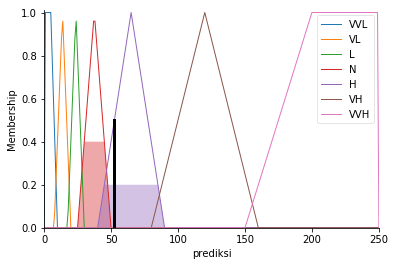

In [13]:
print(TestCase.output['prediksi'])
prediksi.view(sim=TestCase)

Didapatkanlah keluaran dalam bentuk fuzzy mamdani dengan nilai 52.576

<html>
    <p><cite>Sumber:<a href="http://www.ejurnal.its.ac.id/index.php/teknik/article/viewFile/14114/2543">Peramalan Jumlah Kasus Demam Berdarah di Kabupaten Malang Menggunakan Metode Fuzzy Inference System</a></cite> </p>
</html>

<html>
    <a href="http://www.unsri.ac.id/?act=detil_mahasiswa&mhs=09011281722064-9-10003&akt=2017" target="_blank">Mohammad El Qiliqsandy<br>09011281722064<br><img src="https://akademik.unsri.ac.id/images/foto_mhs/2017/09011281722064.jpg" width=100 align="left"><img></a>
    <a href="http://unsri.ac.id"><img src="https://upload.wikimedia.org/wikipedia/en/9/92/UNSRI_Logo.png" align="right" width=140></img></a>
</html>